# Video Game Sales Analysis

In [68]:
from datetime import datetime
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import plotly.express as px

In [69]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
#!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [71]:
vg = pd.read_csv("C:/Users/jonir/Downloads/vgsales.csv/vgsales.csv")
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [176]:
vg2 = vg.loc[vg['Year'] <= 2016.0]
vg2.sort_values(by = ['Year'], ascending = False).head(4)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13435,13437,Mighty No. 9,PS4,2016.0,Platform,Deep Silver,0.04,0.00,0.00,0.01,0.05
13100,13102,Mirror's Edge Catalyst,PC,2016.0,Platform,Electronic Arts,0.01,0.03,0.00,0.01,0.05
10827,10829,Taiko no Tatsujin: Don Don! Mystery Adventure,3DS,2016.0,Action,Namco Bandai Games,0.00,0.00,0.09,0.00,0.09
4509,4511,Overwatch,PC,2016.0,Shooter,Activision,0.22,0.18,0.00,0.04,0.43


In [74]:
vg2['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [75]:
vg2.shape

(16323, 12)

data frame has 16598 rows and 12 columns

In [76]:
#number of null values in each column
vg2.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
total_sales      0
dtype: int64

In [77]:
#data types
vg2.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
total_sales     float64
dtype: object

In [78]:
#Summary of total sales
vg2['Global_Sales'].describe()

count    16323.000000
mean         0.540343
std          1.565906
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

In [79]:
Sales_region_data = {'Region': ['NA', 'EU', 'JP', 'Other'],
        'Sales' :[(vg2['NA_Sales'].sum()),(vg2['EU_Sales'].sum()), (vg2['JP_Sales'].sum()), (vg2['Other_Sales'].sum())]
        }

dfsr = pd.DataFrame(Sales_region_data, index=['NA', 'EU', 'JP','Other'])

dfsr

,Region,Sales
NA,NA,4333.16
EU,EU,2409.12
JP,JP,1284.25
Other,Other,788.99


<AxesSubplot:title={'center':'Sales By Region'}, xlabel='Region'>

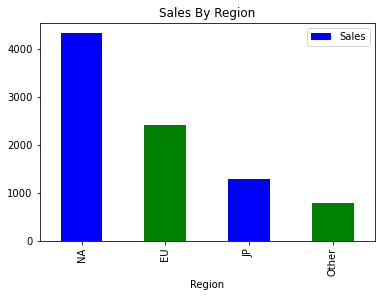

In [80]:
dfsr.plot(x="Region", y= 'Sales', kind="bar",color= ('blue','green'), title= 'Sales By Region')

In [81]:
vg2['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [82]:
#Creating subset df for each genre
Sports1 = (vg2.loc[vg2['Genre'] == 'Sports'])
Platform1 = (vg2.loc[vg2['Genre'] == 'Platform'])
Racing1 = (vg2.loc[vg2['Genre'] == 'Racing'])
RolePlaying1 = (vg2.loc[vg2['Genre'] == 'Role-Playing'])
Puzzle1 = (vg2.loc[vg2['Genre'] == 'Puzzle'])
Misc1 = (vg2.loc[vg2['Genre'] == 'Misc'])
Shooter1 = (vg2.loc[vg2['Genre'] == 'Shooter'])
Simulation1 = (vg2.loc[vg2['Genre'] == 'Simulation'])
Action1 = (vg2.loc[vg2['Genre'] == 'Action'])
Fighting1 = (vg2.loc[vg2['Genre'] == 'Fighting'])
Adventure1 = (vg2.loc[vg2['Genre'] == 'Adventure'])
Strategy1 = (vg2.loc[vg2['Genre'] == 'Strategy'])


In [83]:
#Total sales for each video game genre
genre_sales_data = {'Genre': ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'],
        'Sales' :[(Sports1['Global_Sales'].sum()), (Platform1['Global_Sales'].sum()), (Racing1['Global_Sales'].sum()), (RolePlaying1['Global_Sales'].sum()), (Puzzle1['Global_Sales'].sum()), (Misc1['Global_Sales'].sum()),
      (Shooter1['Global_Sales'].sum()),  (Simulation1['Global_Sales'].sum()), (Action1['Global_Sales'].sum()), (Fighting1['Global_Sales'].sum()), (Adventure1['Global_Sales'].sum()),(Strategy1['Global_Sales'].sum())]}

dfgs = pd.DataFrame(genre_sales_data, index=['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'])


dfgs.head()

,Genre,Sales
Sports,Sports,1309.24
Platform,Platform,829.15
Racing,Racing,726.77
Role-Playing,Role-Playing,923.80
Puzzle,Puzzle,242.22


<AxesSubplot:title={'center':'Sales By Genre'}, ylabel='Genre'>

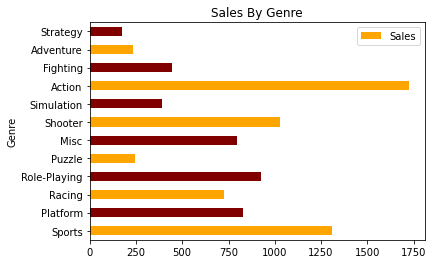

In [84]:
dfgs.plot(x="Genre", y= 'Sales', kind="barh",color= ('orange', 'maroon'), title= 'Sales By Genre')

In [85]:
#Number of games sold for each video game genre
genre_count_data = {'Genre': ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'],
        'Sales' :[(len(Sports1)), (len(Platform1)), (len(Racing1)), (len(RolePlaying1)), (len(Puzzle1)), (len(Misc1)), (len(Shooter1)), (len(Simulation1)), (len(Action1)), (len(Fighting1)), (len(Adventure1)),(len(Strategy1))]
                   }

dfgc = pd.DataFrame(genre_count_data, index=['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'])

dfgc.head()

,Genre,Sales
Sports,Sports,2304
Platform,Platform,876
Racing,Racing,1226
Role-Playing,Role-Playing,1469
Puzzle,Puzzle,571


<AxesSubplot:title={'center':'Games Released By Genre'}, ylabel='Genre'>

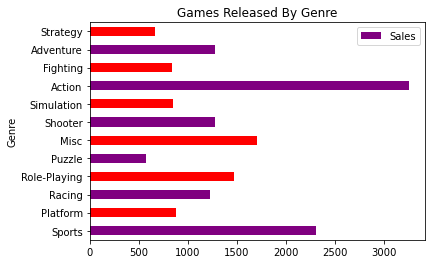

In [86]:
dfgc.plot(x="Genre", y= 'Sales', kind="barh",color= ('purple', 'red'), title= 'Games Released By Genre')

In [87]:
#aggregating total sales by year
vgyt = vg2.groupby(['Year'])[['Global_Sales']].count()
total_sales_by_year = vg2.groupby(['Year'])[['Global_Sales']].sum()
total_sales_by_year['Games Released Per Year'] = vgyt['Global_Sales']
total_sales_by_year.head(3)

,Global_Sales,Games Released Per Year
Year,,
1980.0,11.38,9
1981.0,35.77,46
1982.0,28.86,36


<AxesSubplot:title={'center':'Video Game Sales and Games Released Per Year'}, xlabel='Year', ylabel='Number of Games Sold'>

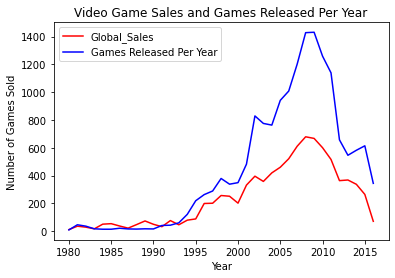

In [88]:
total_sales_by_year.plot(xlabel = 'Year' ,ylabel = 'Number of Games Sold', kind="line", color = ('red', 'blue') , title = 'Video Game Sales and Games Released Per Year')

In [89]:
vgp = vg2.groupby('Platform')[['Global_Sales']].sum()
top_vgp = vgp.sort_values(by = ['Global_Sales'], ascending = False).head(10)
top_vgp.head()

,Global_Sales
Platform,
PS2,1233.46
X360,969.61
PS3,949.35
Wii,909.81
DS,818.67


In [90]:
fig = px.pie(top_vgp, values='Global_Sales', names = top_vgp.index, title='Console Popularity')
fig.show()

In [91]:
vgpub = vg2.groupby('Publisher')[['Global_Sales']].sum()
top_vgpub = vgpub.sort_values(by = ['Global_Sales'], ascending = False).head(10)
top_vgpub.head()

,Global_Sales
Publisher,
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.25


In [92]:
fig2 = px.pie(top_vgpub, values='Global_Sales', names = top_vgpub.index, title='Publisher Popularity')
fig2.show()

In [93]:
sbg = vg2.groupby('Name')[['Global_Sales']].sum()
top_sbg = sbg.sort_values(by = ['Global_Sales'], ascending = False).head(10)
top_sbg.head()

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82


Text(0, 0.5, 'Game')

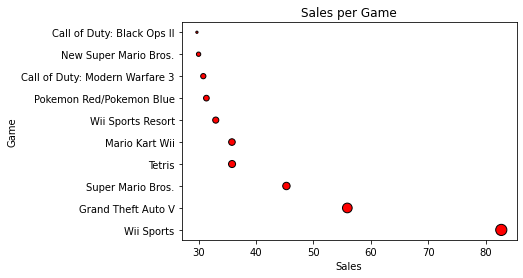

In [94]:
sizes = np.array([500,375,220,200,175,150,130,110,75,20])
plt.scatter(top_sbg['Global_Sales'], top_sbg.index, c = 'red', linewidths = 1, marker = '.', edgecolor = 'black', s= sizes, label = True)
plt.title('Sales per Game')
plt.xlabel('Sales')
plt.ylabel('Game')

# Linear Regression Models

Model 1 (test size 30) North America and Europe used as Predictors for Global Sales Trend

In [144]:
X1 = vg2.loc[:, ["NA_Sales","EU_Sales"]]
y1 = vg2['Global_Sales']

In [145]:
#partitioning data into train test split, test size 30%

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=1)

print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(11426, 2)
(4897, 2)
(11426,)
(4897,)


In [146]:
# Finding intercept and slope of train data

from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X1_train, y1_train)

print('Intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

Intercept: 0.12149861572465387
slope: [2.17039609 5.13246926]


In [147]:
#Finding intercept and slope of origional data

from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X1, y1)

print('Intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

Intercept: 0.12149861572465387
slope: [2.17039609 5.13246926]


In [151]:
#Predicted Values

y_pred1 = regressor.predict(X1_test)
dfyp = pd.DataFrame(y_pred1)
y_pred1

C:\Users\jonir\Downloads\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- EU_Sales
- NA_Sales
Feature names seen at fit time, yet now missing:
- JP_Sales
- Other_Sales




array([0.80046046, 1.33692042, 0.36024219, ..., 0.27342634, 0.224148  ,
       1.08848237])

In [153]:
#Table comparing the predicted values to the actual values

comparison_df1 = pd.DataFrame({"Actual":y1_test,"Predicted":y_pred1})
cdf1 = comparison_df1.reset_index()
cdfd1 = cdf1.drop(['index'], axis = 1)
cdfd1.set_index('Actual').head()

,Predicted
Actual,
0.24,0.800460
0.59,1.336920
0.11,0.360242
0.46,0.997574
0.09,0.295130


In [154]:
#Predicted values summary

cdfd1['Predicted'].describe()

count    4897.000000
mean        1.433180
std         3.527127
min         0.121499
25%         0.172823
50%         0.441188
75%         1.303744
max        77.790873
Name: Predicted, dtype: float64

In [155]:
# Actual values summary 
cdfd1['Actual'].describe()

count    4897.000000
mean        0.532742
std         1.404357
min         0.010000
25%         0.060000
50%         0.170000
75%         0.480000
max        31.370000
Name: Actual, dtype: float64

In [157]:
#Difference between actual and predicted

residuals1 = y1_test - y_pred1
residuals1

6948    -0.560460
3388    -0.746920
10001   -0.250242
4252    -0.537574
11143   -0.205130
           ...   
11385   -0.041499
10837   -0.293992
11943   -0.203426
15567   -0.204148
3844    -0.568482
Name: Global_Sales, Length: 4897, dtype: float64

In [160]:
#  The Mean absolute error value represents the average value of error, 
#  or the difference between the actual values and predicted values.

from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y1_test,y_pred1))

MAE: 0.9409449241353399


In [161]:
#The Mean square error represents the average of the squares, of each error

from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y1_test,y_pred1))

MSE 5.6372150027894445


In [162]:
#Square root of the mean square error

import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y1_test,y_pred1)))

RMSE 2.37428199731823


In [163]:
#the r squared value represents the overall accuracy of the model. Model 1 is 95% accurate.

from sklearn.metrics import r2_score
r21 = r2_score(y1_test,y_pred1)
print(r2)

0.9543806090362525


Model 2 (using different predictors)

In [164]:
X = vg2.loc[:, ["JP_Sales","Other_Sales"]]
y = vg2['Global_Sales']

In [165]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(11426, 2)
(4897, 2)
(11426,)
(4897,)


In [166]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train2, y_train2)

print('Intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

Intercept: 0.10127068863346722
slope: [2.0236442  5.82523473]


In [167]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

print('Intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

Intercept: 0.12149861572465387
slope: [2.17039609 5.13246926]


In [168]:
y_pred2 = regressor.predict(X_test2)
y_pred2

array([0.34850135, 0.27547269, 0.17282331, ..., 0.17282331, 0.12149862,
       0.52008668])

In [169]:
comparison_df2 = pd.DataFrame({"Actual":y_test2,"Predicted":y_pred2})
comparison_df2

,Actual,Predicted
6948,0.24,0.348501
3388,0.59,0.275473
10001,0.11,0.172823
4252,0.46,0.429447
11143,0.09,0.172823
...,...,...
11385,0.08,0.295130
10837,0.09,0.172823
11943,0.07,0.172823
15567,0.02,0.121499


In [170]:
residuals2 = y_test2 - y_pred2
residuals2

6948    -0.108501
3388     0.314527
10001   -0.062823
4252     0.030553
11143   -0.082823
           ...   
11385   -0.215130
10837   -0.082823
11943   -0.102823
15567   -0.101499
3844    -0.000087
Name: Global_Sales, Length: 4897, dtype: float64

In [171]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(y_test2,y_pred2))

MAE: 0.27206001513369454


In [172]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test2,y_pred2))

MSE 0.6119906185221453


In [173]:
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test2,y_pred2)))

RMSE 0.7822982925471238


In [175]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred2)
print(r2)

0.6896308583975583
